In [3]:
# load histories for Dale-CB
import pickle
with open('weights/05_Dale-CB_48.pkl', 'rb') as f:
    weights = pickle.load(f)
    historys = pickle.load(f)
    parameters = pickle.load(f)
# load weights
P, W, read_out, K, C, P_z, b_z, e_e, e_i, b_v = weights
v_t_history, z_t_history, labelslist = historys
input_size, hidden_size, num_layers, num_classes, batch_size, num_epochs, learning_rate, stride_number = parameters


Text(0.5, 1.0, 'Performance of different models')

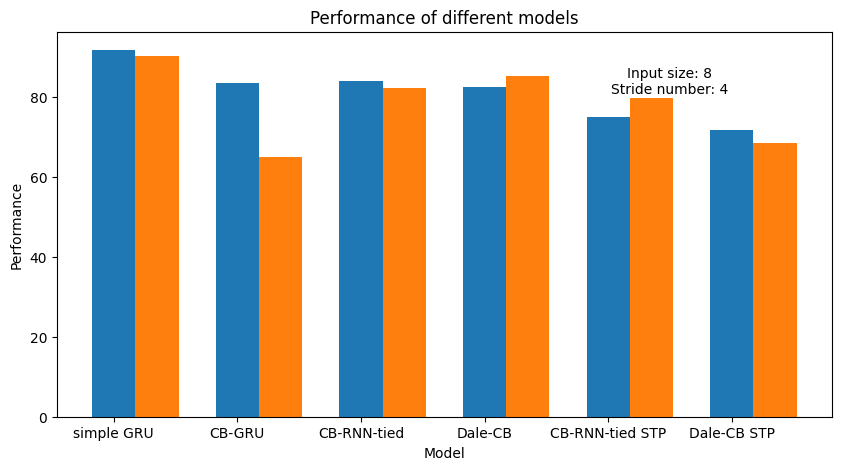

In [4]:
# Performance bar plot
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
model_name = ['simple GRU', 'CB-GRU', 'CB-RNN-tied', 'Dale-CB', 'CB-RNN-tied STP', 'Dale-CB STP']

perf1 = [91.62, 83.39, 83.95, 82.48, 75.0, 71.63]
perf2 = [90.03, 64.96, 82.07, 85.13, 79.76, 68.31]

bar_width = 0.35

plt.bar(model_name, perf1, bar_width, label='24 Neurons')
index = np.arange(len(model_name))
plt.bar(index + bar_width, perf2, bar_width, label='48 Neurons')
# text bar to show input size, stride number, and hidden size
plt.text(4.5, 80, f'Input size: {input_size}\nStride number: {stride_number}'.format(input_size=input_size, stride_number=stride_number, hidden_size=hidden_size), ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Performance')
plt.title('Performance of different models')


### Parameters

In [19]:
import numpy as np
def convert_history(history_list):
    concatenated_history = []
    for batch in history_list:
        # Convert each tensor in the batch to numpy and append to a new list
        batch_history = [tensor.cpu().numpy() for tensor in batch]
        # Stack along a new dimension to keep batch data separate
        concatenated_history.append(np.stack(batch_history))
    # Concatenate all the batch data along the first dimension
    return np.concatenate(concatenated_history, axis=0)


def average_image(X_history, labelslist):

    neuronimage = []
    labelslist_array = convert_history(labelslist)
    order= np.argsort(labelslist_array.flatten())
    labelslist_array = labelslist_array.flatten()[order]
    # find number of 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
    _, counts = np.unique(labelslist_array, return_counts=True)
    X  = convert_history(X_history)
    X = X.reshape((250, 196, 48, 40))
    X = X.transpose(0, 3, 1, 2)
    X = X.reshape((10000, 196, 48))
    k=0
    for i in range(10):
        X_label = X[k:k+counts[i],:,:]
        X_label = X_label.mean(axis=0)
        neuronimage.append(X_label)
        k += counts[i]
    neuronimage = np.array(neuronimage)
    return neuronimage

def average_image_v(X_history, labelslist):

    neuronimage = []
    labelslist_array = convert_history(labelslist)
    order= np.argsort(labelslist_array.flatten())
    labelslist_array = labelslist_array.flatten()[order]
    # find number of 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
    _, counts = np.unique(labelslist_array, return_counts=True)
    X  = convert_history(X_history)
    X = X.transpose(0, 2, 1)
    X = X.reshape((250, 196, 48, 40))
    X = X.transpose(0, 3, 1, 2)
    X = X.reshape((10000, 196, 48))
    k=0
    for i in range(10):
        X_label = X[k:k+counts[i],:,:]
        X_label = X_label.mean(axis=0)
        neuronimage.append(X_label)
        k += counts[i]
    neuronimage = np.array(neuronimage)
    return neuronimage


def average_timechunk(X_history):
    X = convert_history(X_history)
    X = X.transpose(0, 2, 1)
    X = X.reshape((250, 196, 48, 40))
    X = X.transpose(0, 3, 1, 2)
    X = X.reshape((10000, 196, 48))
    X = X.mean(axis=0)
    X1, X2, X3, X4 = np.split(X, 4, axis=1)
    return X1, X2, X3, X4

In [21]:
# Plot sns jointplot of z_t and v_t
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

v_nt = average_image(v_t_history, labelslist)

ValueError: need at least one array to stack